URL : https://steemit.com/kr/@codingart/6-24-keras-lstm-airline-market-rnn-2

URL_data : https://www.kaggle.com/andreazzini/international-airline-passengers?select=international-airline-passengers.csv

## Problem Description - 국제선 여객 예측 문제
- 년 단위 항공기 이용 승객 데이터를 이용하여 다음번 승객의 수를 예측
- 1949년 1월 ~ 1960년 12월 까지 12년 동안의 144회 데이터

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [34]:
data = pd.read_csv('data/international-airline-passengers.csv', skiprows=1, names = ['Month', 'Passengers'], nrows=144)

In [35]:
data.head()

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [36]:
data.tail()

,Month,Passengers
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390
143,1960-12,432


In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Month       144 non-null    object
 1   Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [38]:
data.describe()

,Passengers
count,144.000000
mean,280.298611
std,119.966317
min,104.000000
25%,180.000000
50%,265.500000
75%,360.500000
max,622.000000


#### Passengers plot

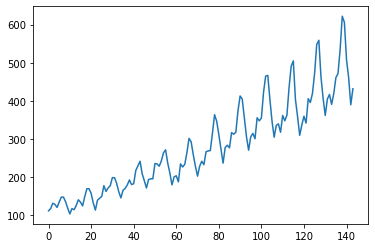

In [39]:
plt.plot(data['Passengers'])
plt.show()

#### Preprocessing

In [40]:
dataset = data[['Passengers']]
# dataset = dataset.astype('float32')
# dataset = dataset.reshape(-1, 1).shape

In [41]:
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

- 예측할 값만 가져와서 스케일러 적용

#### x, y 함수 생성 (x는 바로 앞의 값)

In [42]:
def create_dataset(dataset, look_back=1): # len(dataset)이 144 이므로 range는 142 즉, 인덱스 i는 0 ~ 141까지
    dataX, dataY = [], []
    for i in range(len(dataset) - look_back-1): # 마지막 dataset[141:142, 0]
        a = dataset[i: (i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0]) # dataset[142, 0 ]은 143번 데이터 144개의 마지막 데이터에 해당
    return np.array(dataX), np.array(dataY)

- 데이터를 입력 데이터의 다음 스텝을 지정

#### Train, Test Split

In [43]:
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size, :], dataset[train_size:len(dataset),:]

In [44]:
len(train), len(test)

(96, 48)

#### x, y 생성

In [45]:
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testy = create_dataset(test, look_back)

In [46]:
# LSTM 루틴에 입력할 수 있도록 2차원 텐서에서 3차원 텐서로 변경
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

#### LSTM fit

In [47]:
model = Sequential()
model.add(LSTM(4, input_shape = (1, look_back)))
model.add(Dense(1)) # 입력 4개를 받아서, 1개를 출력

In [48]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 4)                 96        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 5         
Total params: 101
Trainable params: 101
Non-trainable params: 0
_________________________________________________________________


In [49]:
model.compile(loss='mean_squared_error', optimizer = 'adam')
model.fit(trainX, trainY, epochs=100, batch_size =1, verbose=2)

Epoch 1/100
94/94 - 0s - loss: 0.0457
Epoch 2/100
94/94 - 0s - loss: 0.0218
Epoch 3/100
94/94 - 0s - loss: 0.0178
Epoch 4/100
94/94 - 0s - loss: 0.0165
Epoch 5/100
94/94 - 0s - loss: 0.0153
Epoch 6/100
94/94 - 1s - loss: 0.0143
Epoch 7/100
94/94 - 1s - loss: 0.0132
Epoch 8/100
94/94 - 1s - loss: 0.0122
Epoch 9/100
94/94 - 1s - loss: 0.0109
Epoch 10/100
94/94 - 1s - loss: 0.0099
Epoch 11/100
94/94 - 0s - loss: 0.0088
Epoch 12/100
94/94 - 0s - loss: 0.0078
Epoch 13/100
94/94 - 0s - loss: 0.0070
Epoch 14/100
94/94 - 1s - loss: 0.0060
Epoch 15/100
94/94 - 0s - loss: 0.0053
Epoch 16/100
94/94 - 0s - loss: 0.0046
Epoch 17/100
94/94 - 0s - loss: 0.0040
Epoch 18/100
94/94 - 0s - loss: 0.0034
Epoch 19/100
94/94 - 0s - loss: 0.0031
Epoch 20/100
94/94 - 0s - loss: 0.0029
Epoch 21/100
94/94 - 0s - loss: 0.0026
Epoch 22/100
94/94 - 0s - loss: 0.0024
Epoch 23/100
94/94 - 0s - loss: 0.0023
Epoch 24/100
94/94 - 0s - loss: 0.0022
Epoch 25/100
94/94 - 0s - loss: 0.0022
Epoch 26/100
94/94 - 0s - loss: 0.

#### LSTM Prediction

In [50]:
# make predictions

trainpredict = model.predict(trainX)
testpredict = model.predict(testX)

In [51]:
# invert predictions

trainpredict = scaler.inverse_transform(trainpredict)
trainY = scaler.inverse_transform([trainY])
testpredict = scaler.inverse_transform(testpredict)
testy = scaler.inverse_transform([testy])

#### Result

In [52]:
trainscore = mean_squared_error(trainY[0], trainpredict[:, 0], squared=False)
print('Train Score :', trainscore)
testscore = mean_squared_error(testy[0], testpredict[:, 0], squared=False)
print('Test Score :', testscore)

Train Score : 23.098821249759162
Test Score : 48.40781661024821


#### Plot

In [54]:
trainpredictplot = np.empty_like(dataset)
trainpredictplot[:,:] = np.nan
trainpredictplot[look_back:len(trainpredict) + look_back, :] = trainpredict

In [55]:
testpredictplot = np.empty_like(dataset)
testpredictplot[:, :] = np.nan
testpredictplot[len(trainpredict)+(look_back*2)+1:len(dataset)-1, :] = testpredict

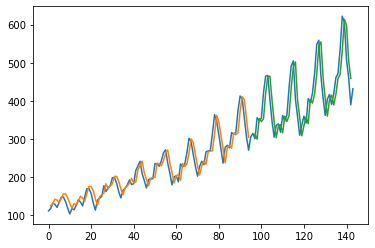

In [57]:
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainpredictplot)
plt.plot(testpredictplot)
plt.show()